In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
def gen(s):
    if s=='female':
        return 0
    else:
        return 1

In [5]:
df['Gender']=df.gender.apply(gen)

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Gender
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


In [8]:
df.describe()

,math score,reading score,writing score,Gender
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,0.482000
std,15.16308,14.600192,15.195657,0.499926
min,0.00000,17.000000,10.000000,0.000000
25%,57.00000,59.000000,57.750000,0.000000
50%,66.00000,70.000000,69.000000,0.000000
75%,77.00000,79.000000,79.000000,1.000000
max,100.00000,100.000000,100.000000,1.000000


In [9]:
passing_marks=40
df['Maths Status'] = np.where(df['math score']<passing_marks,'F','P')
df['Maths Status'].value_counts()

P    960
F     40
Name: Maths Status, dtype: int64

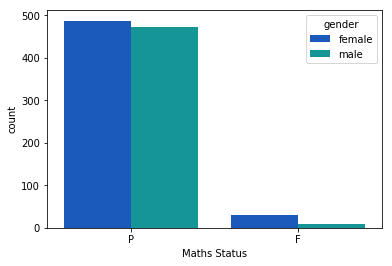

In [10]:
sns.countplot(df['Maths Status'],hue=df['gender'],palette='winter')

In [11]:
df["Reading Status"]=np.where(df['reading score']<passing_marks,'F','P')
df["Reading Status"].value_counts()

P    974
F     26
Name: Reading Status, dtype: int64

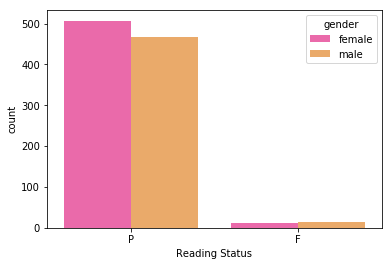

In [12]:
sns.countplot(df['Reading Status'],hue=df['gender'],palette='spring')

In [13]:
df['Writing Status']=np.where(df['writing score']<passing_marks,'F','P')
df['Writing Status'].value_counts()

P    968
F     32
Name: Writing Status, dtype: int64

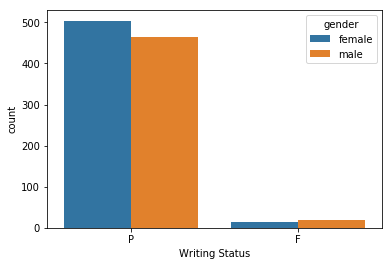

In [14]:
sns.countplot(df['Writing Status'],hue=df['gender'])

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Gender,Maths Status,Reading Status,Writing Status
0,female,group B,bachelor's degree,standard,none,72,72,74,0,P,P,P
1,female,group C,some college,standard,completed,69,90,88,0,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,0,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,P,P,P
4,male,group C,some college,standard,none,76,78,75,1,P,P,P


In [16]:
df['Total score']=(df['math score']+df['reading score']+df['writing score'])//3


In [17]:
df['Passing marks']=np.where(df['Total score']<passing_marks,"F","P")
df["Passing marks"].value_counts()

P    970
F     30
Name: Passing marks, dtype: int64

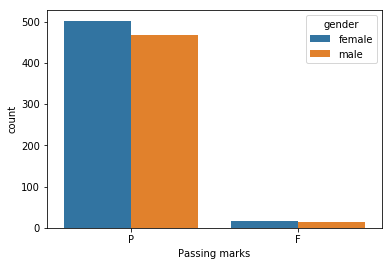

In [18]:
sns.countplot(df["Passing marks"],hue=df['gender'])

In [19]:
def grades(pass_status,total_marks):
    if pass_status == 'F':
        return 'F'
    if total_marks >=90:
        return 'A+'
    if total_marks >=80:
        return 'A'
    if total_marks >=70:
        return 'B'
    if total_marks >=60:
        return 'C'
    if total_marks >=50:
        return 'D'
    if total_marks >=40:
        return 'E'
    
df['Total_grades']=df.apply(lambda x:grades(x['Passing marks'],x['Total score']),axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Gender,Maths Status,Reading Status,Writing Status,Total score,Passing marks,Total_grades
0,female,group B,bachelor's degree,standard,none,72,72,74,0,P,P,P,72,P,B
1,female,group C,some college,standard,completed,69,90,88,0,P,P,P,82,P,A
2,female,group B,master's degree,standard,none,90,95,93,0,P,P,P,92,P,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,P,P,P,49,P,E
4,male,group C,some college,standard,none,76,78,75,1,P,P,P,76,P,B


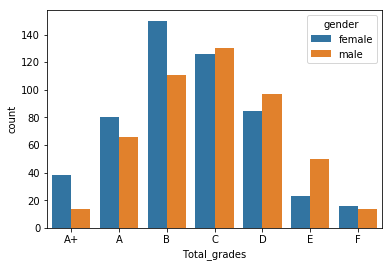

In [20]:
sns.countplot(df['Total_grades'],hue=df['gender'],order=['A+','A','B','C','D','E','F'])

In [21]:
df.describe()

,math score,reading score,writing score,Gender,Total score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,0.482000,67.445000
std,15.16308,14.600192,15.195657,0.499926,14.263324
min,0.00000,17.000000,10.000000,0.000000,9.000000
25%,57.00000,59.000000,57.750000,0.000000,58.000000
50%,66.00000,70.000000,69.000000,0.000000,68.000000
75%,77.00000,79.000000,79.000000,1.000000,77.000000
max,100.00000,100.000000,100.000000,1.000000,100.000000


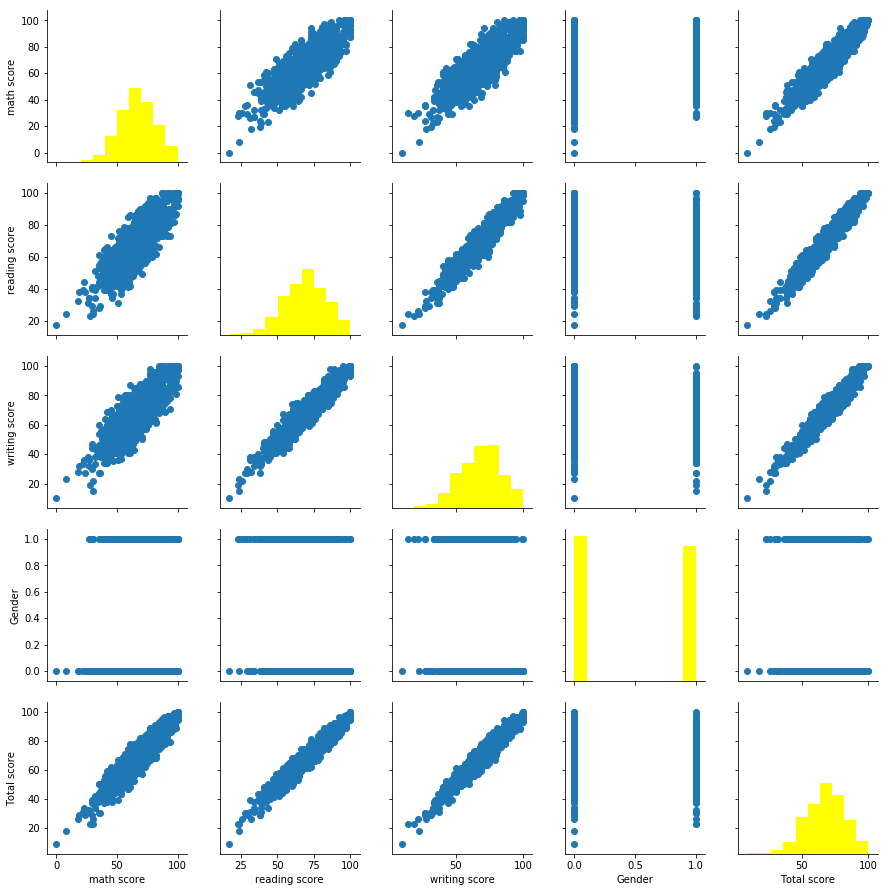

In [25]:
x=sns.PairGrid(df)
x.map_diag(plt.hist,color='yellow')
x.map_offdiag(plt.scatter)

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Gender,Maths Status,Reading Status,Writing Status,Total score,Passing marks,Total_grades
0,female,group B,bachelor's degree,standard,none,72,72,74,0,P,P,P,72,P,B
1,female,group C,some college,standard,completed,69,90,88,0,P,P,P,82,P,A
2,female,group B,master's degree,standard,none,90,95,93,0,P,P,P,92,P,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,P,P,P,49,P,E
4,male,group C,some college,standard,none,76,78,75,1,P,P,P,76,P,B


In [28]:
del df['race/ethnicity']
del df['parental level of education']
del df['Total_grades']
del df['gender']
df.head()

,lunch,test preparation course,math score,reading score,writing score,Gender,Maths Status,Reading Status,Writing Status,Total score,Passing marks
0,standard,none,72,72,74,0,P,P,P,72,P
1,standard,completed,69,90,88,0,P,P,P,82,P
2,standard,none,90,95,93,0,P,P,P,92,P
3,free/reduced,none,47,57,44,1,P,P,P,49,P
4,standard,none,76,78,75,1,P,P,P,76,P


In [29]:
df.columns=['lunch','testprepcourse','mathscore','readingscore','writingscore','gender','mathsstatus','readingstatus','writingstatus','totalscore','passingmarks']

In [30]:
df.head()

,lunch,testprepcourse,mathscore,readingscore,writingscore,gender,mathsstatus,readingstatus,writingstatus,totalscore,passingmarks
0,standard,none,72,72,74,0,P,P,P,72,P
1,standard,completed,69,90,88,0,P,P,P,82,P
2,standard,none,90,95,93,0,P,P,P,92,P
3,free/reduced,none,47,57,44,1,P,P,P,49,P
4,standard,none,76,78,75,1,P,P,P,76,P


In [31]:
def fun_1(c):
    if c=='F':
        return 1
    else:
        return 0
df['Lunch']=df.lunch.apply(fun_1)

In [34]:
def fun(x):
    if x=='none':
        return 0
    else:
        return 1
df['Testprepcourse']=df.testprepcourse.apply(fun)

In [36]:
def fun(x):
    if x=='P':
        return 0
    else:
        return 1
df['Maths Status']=df.mathsstatus.apply(fun)

In [37]:
def fun(x):
    if x=='P':
        return 0
    else:
        return 1
df['Reading Status']=df.readingstatus.apply(fun)

In [39]:
def fun(r):
    if r=='P':
        return 0
    else:
        return 1
df['Writing Status']=df.writingstatus.apply(fun)    

In [41]:
def fun(r):
    if r=='P':
        return 0
    else:
        return 1
df['Passing Marks']=df.passingmarks.apply(fun)    

In [44]:
df.drop(['lunch','testprepcourse','mathsstatus','readingstatus','writingstatus','passingmarks'],axis=1,inplace=True)

In [55]:
df.head()

,mathscore,readingscore,writingscore,gender,totalscore,Lunch,Testprepcourse,Maths Status,Reading Status,Writing Status,Passing Marks
0,72,72,74,0,72,0,0,0,0,0,0
1,69,90,88,0,82,0,1,0,0,0,0
2,90,95,93,0,92,0,0,0,0,0,0
3,47,57,44,1,49,0,0,0,0,0,0
4,76,78,75,1,76,0,0,0,0,0,0


In [57]:
df['Totalscore']=(df['mathscore']+df['readingscore']+df['writingscore'])//3
#del df['totalscore']
df.head()

,mathscore,readingscore,writingscore,gender,Lunch,Testprepcourse,Maths Status,Reading Status,Writing Status,Passing Marks,Totalscore
0,72,72,74,0,0,0,0,0,0,0,72
1,69,90,88,0,0,1,0,0,0,0,82
2,90,95,93,0,0,0,0,0,0,0,92
3,47,57,44,1,0,0,0,0,0,0,49
4,76,78,75,1,0,0,0,0,0,0,76


In [58]:
np.savetxt("Student_Exams.csv",df,delimiter=",",fmt="%0.5f")
data=np.genfromtxt("Student_Exams.csv",delimiter=",")
data.shape

(1000, 11)

In [124]:

                                    #MACHINE LEARNING


x=data[:,0:10]
y=data[:,10:11]


In [125]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(x,y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(750, 10)
(250, 10)
(750, 1)
(250, 1)


In [127]:
from sklearn.linear_model import LinearRegression
algl=LinearRegression()
algl.fit(X_train,Y_train)
Y_pred=algl.predict(X_test)
Y_pred

array([[64.67995881],
       [82.01234755],
       [50.67083191],
       [75.33285867],
       [85.66867097],
       [69.67822695],
       [97.0048451 ],
       [82.68616068],
       [68.67461317],
       [75.33497765],
       [99.67501538],
       [49.69457015],
       [43.68539321],
       [71.00401181],
       [74.33561496],
       [87.0141963 ],
       [68.99569147],
       [70.67058928],
       [50.01682061],
       [39.29259574],
       [73.99338168],
       [70.00861077],
       [68.66411162],
       [67.99884889],
       [55.66877138],
       [73.667422  ],
       [37.95197883],
       [67.66358893],
       [58.33980527],
       [53.66050341],
       [61.33579446],
       [56.33110389],
       [63.32831065],
       [65.01975139],
       [82.34099718],
       [29.30159299],
       [84.68894925],
       [77.99616937],
       [89.3533577 ],
       [72.33247764],
       [77.00912557],
       [45.00862189],
       [79.33597503],
       [58.3324832 ],
       [80.34895044],
       [67

In [130]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_test,Y_pred))

0.07528393623939517
